In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv("/home/abduttayyeb/Desktop/Prac PBL/Dataset_Final.csv") 
dataset 
data = dataset.iloc[:,:-1].values
label = dataset.iloc[:,-1].values
 
labelencoder = LabelEncoder()
 
#---------------Conversion Of All Categorical Column Values To Numerical--------#
 
for i in range(0,5):
    data[:,i] = labelencoder.fit_transform(data[:,i]) 
data1=pd.DataFrame(data[:,:5])
data1
 
for i in range(7,12):
    data[:,i]=labelencoder.fit_transform(data[:,i])
data2=pd.DataFrame(data[:,7:12])
data2



#--------------Normalizing uncat data------------------------------------------#
from sklearn.preprocessing import Normalizer
data3=dataset.iloc[:,[5,6,12]]
dataset.iloc[:,:5]
normalized_data = Normalizer().fit_transform(data3)
data3=pd.DataFrame(normalized_data)
data3
#-----------------------Encoded Combined Data-----------------------------------------#
 
data_full=pd.concat([data1,data2,data3],axis=1)
data_full=data_full.values
data_full=pd.DataFrame(data_full,columns=["Olympiad Participation","Scholarship","Love Going To School","Favourite Subject","Projects Made(Any)","Medals Won","Career In Sports?","Participation In Sports Activities","Create Fantasy Paintings ?","Won ART Competitions","Grasping Power","Playtime For Sports","TimeSpent On ART"])
data_full
#---------------------------------Encoding labels-----------------------------------#
 
label=labelencoder.fit_transform(label)
label=pd.DataFrame(label)
 
 
#---------------Specifying Percentage of test data from whole data--------#
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_full,label,test_size=0.2,random_state=0)
 
data_full


/home/abduttayyeb/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Olympiad Participation,Scholarship,Love Going To School,Favourite Subject,Projects Made(Any),Medals Won,Career In Sports?,Participation In Sports Activities,Create Fantasy Paintings ?,Won ART Competitions,Grasping Power,Playtime For Sports,TimeSpent On ART
0,1,1,1,2,1,1,0,0,0,0,0.845154,0.169031,0.507093
1,1,1,1,2,1,0,0,0,0,1,0.801784,0.534522,0.267261
2,1,1,1,3,1,1,0,0,0,1,0.96225,0.19245,0.19245
3,1,1,1,2,1,1,0,0,0,0,0.845154,0.169031,0.507093
4,1,1,1,3,1,0,0,0,0,1,0.811107,0.486664,0.324443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0,0,1,3,0,1,1,1,0,1,0.801784,0.267261,0.534522
1597,1,0,1,0,1,0,1,0,0,2,0.624695,0.468521,0.624695
1598,1,0,1,0,0,0,1,0,0,0,0.639602,0.639602,0.426401
1599,1,1,1,0,0,1,1,0,1,0,0.742781,0.557086,0.371391


In [3]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear",random_state=0)
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

##---------------------------------MODEL PERFORMANCE----------------------------------------------##

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
rc=recall_score(y_test,y_pred,average="weighted")
ps=precision_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")
#print("Confusion Matrix: \n",cm)
#print("Accuracy Score :",ac)
#print("Recall Score:",rc)
#print("Precision Score:",ps)
#print("F1 Score:",f1)

##--------------------PREDICTING FOR SINGLE ROW/INPUT--------------------##

xx=[1,1,1,0,1,1,0,1,0,1,0.70014,0.70014,0.140028]
nd= Normalizer().fit_transform(np.array([5,5,1]).reshape(-1,1))
Yy=classifier.predict(np.array(xx).reshape(1,-1))

/home/abduttayyeb/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,0
0,0
1,0
2,0
3,0
4,0
...,...
1596,2
1597,2
1598,2
1599,2


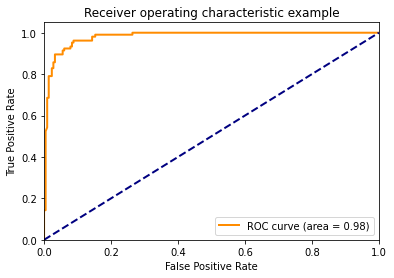

In [3]:

##---------------------PLOTTING ROC CURVE TO DISPLAY DISTINGUISHING PERFORMANCE OF CLASS---------------------##

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle

label = label_binarize(label, classes=[0, 1, 2])
n_classes=label.shape[1]
X_train,X_test,y_train,y_test=train_test_split(data_full,label,test_size=0.2,random_state=0)

classif= OneVsRestClassifier(classifier)
y_score = classif.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [7]:
##--------------------------------DUMPING FOR DEPLOYEMENT-----------------------------------------##

import pickle

from sklearn.svm import SVC
model = SVC(kernel="linear",random_state=0)
model.fit(X_train,y_train)

pkl_filename="pickle_SVM.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model,file)

with open(pkl_filename,'rb') as file:
    pickle_model=pickle.load(file)
    
score=pickle_model.score(X_test,y_test)
print(score)


0.8878504672897196


/home/abduttayyeb/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
